In [1]:
from google.colab import drive
drive.mount('/content/drive')
!unzip "/content/drive/MyDrive/virtual-try-on-outfit-change.zip" -d /content/

import os
os.chdir('/content/virtual-try-on-outfit-change')
!ls
import sys
current_project_path = os.getcwd()
if current_project_path not in sys.path:
    sys.path.append(current_project_path)
    print(f"Added {current_project_path} to sys.path")

Mounted at /content/drive
Archive:  /content/drive/MyDrive/virtual-try-on-outfit-change.zip
   creating: /content/virtual-try-on-outfit-change/.git/
  inflating: /content/virtual-try-on-outfit-change/.git/config  
  inflating: /content/virtual-try-on-outfit-change/.git/description  
  inflating: /content/virtual-try-on-outfit-change/.git/FETCH_HEAD  
 extracting: /content/virtual-try-on-outfit-change/.git/HEAD  
   creating: /content/virtual-try-on-outfit-change/.git/hooks/
  inflating: /content/virtual-try-on-outfit-change/.git/hooks/applypatch-msg.sample  
  inflating: /content/virtual-try-on-outfit-change/.git/hooks/commit-msg.sample  
  inflating: /content/virtual-try-on-outfit-change/.git/hooks/fsmonitor-watchman.sample  
  inflating: /content/virtual-try-on-outfit-change/.git/hooks/post-update.sample  
  inflating: /content/virtual-try-on-outfit-change/.git/hooks/pre-applypatch.sample  
  inflating: /content/virtual-try-on-outfit-change/.git/hooks/pre-commit.sample  
  inflating:

In [2]:
import os
import sys

project_path = '/content/virtual-try-on-outfit-change' # Make sure this matches your unzipped folder name

os.chdir(project_path)
print(f"Current working directory: {os.getcwd()}")

if project_path not in sys.path:
    sys.path.insert(0, project_path)
print(f"sys.path includes: {project_path in sys.path}")
!ls

Current working directory: /content/virtual-try-on-outfit-change
sys.path includes: True
app.py	 notebook	   setup.py  virtual_try_on
images	 README.md	   try.png   virtual_try_on_outfit_change.egg-info
LICENSE  requirements.txt  venv      with.png


In [3]:
%cd /content/virtual-try-on-outfit-change/
!pip install -e .

/content
Obtaining file:///content/virtual-try-on-outfit-change
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 11.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install -q transformers>=4.38.0 # Ensure a recent version for Phi-3
!pip install -q bitsandbytes>=0.41.0
!pip install -q accelerate>=0.25.0
!pip install -q sentencepiece
!pip install -r requirements.txt
!pip install accelerate
print("Dependencies installed. You might need to restart the runtime now.")
print("Go to 'Runtime' > 'Restart session' in the Colab menu if you encounter import errors with newly installed packages.")

Obtaining file:///content/virtual-try-on-outfit-change (from -r requirements.txt (line 9))
  Preparing metadata (setup.py) ... done
  Attempting uninstall: virtual_try_on_outfit_change
    Found existing installation: virtual_try_on_outfit_change 0.0.1
    Uninstalling virtual_try_on_outfit_change-0.0.1:
      Successfully uninstalled virtual_try_on_outfit_change-0.0.1
  Running setup.py develop for virtual_try_on_outfit_change
Dependencies installed. You might need to restart the runtime now.
Go to 'Runtime' > 'Restart session' in the Colab menu if you encounter import errors with newly installed packages.


In [1]:
!nvidia-smi

import torch

cuda_available = torch.cuda.is_available()
print(f"CUDA available: {cuda_available}")
if cuda_available:
    print(f"Device count: {torch.cuda.device_count()}")
    print(f"Current device: {torch.cuda.current_device()}")
    print(f"Device name: {torch.cuda.get_device_name(torch.cuda.current_device())}")
    print(f"PyTorch version: {torch.__version__}")
    print(f"CUDA version PyTorch was compiled with: {torch.version.cuda}")
    # Set default device to GPU
    torch.set_default_device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"PyTorch default device: {torch.get_default_device()}") # For newer PyTorch versions
else:
    print("CUDA is NOT available. Ensure you've selected a GPU runtime and PyTorch is installed correctly.")

Mon Jun  9 09:54:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
# STEP 4: IMPORTS, INITIAL MODEL LOADING, AND MONKEY PATCH

# --- Standard and System Imports ---
import os
import sys
import torch
from PIL import Image
from IPython.display import display, Image as IPImage # For displaying PIL images in Colab
import matplotlib.pyplot as plt # For more advanced plotting if needed

# --- Ensure Project Path and Working Directory (from previous cells) ---
project_path = '/content/virtual-try-on-outfit-change' # Make sure this matches
if os.getcwd() != project_path:
    os.chdir(project_path)
if project_path not in sys.path:
    sys.path.insert(0, project_path)

print(f"Current working directory: {os.getcwd()}")
print(f"Sys.path includes project: {project_path in sys.path}")

# --- Verify GPU and PyTorch (Quick Check) ---
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    # torch.set_default_device('cuda') # Already done in your try_on.py or should be handled by .to(device)
else:
    print("WARNING: CUDA NOT AVAILABLE!")


# --- Import Your Project Modules ---
# This will trigger model downloads and loading as defined in your .py files
# Including your try_on.py (which should be configured for DPMSolverMultistepScheduler)
print("\nImporting project modules and loading models (this may take several minutes for downloads)...")
try:
    from virtual_try_on.body_segmentation import apply_segmentation, face_analyzer # Import face_analyzer for check
    from virtual_try_on.clothes_segmentation import segment_clothing
    # The following line IMPORTS YOUR try_on.py.
    # Ensure try_on.py is saved with the DPMSolverMultistepScheduler changes.
    from virtual_try_on.try_on import virtual_try_on, pipeline as sdxl_pipeline, ip_adapter_loaded_successfully

    print("\n--- All project modules imported. ---")
    print("--- Model loading messages from your .py files should have appeared above. ---")

    if 'sdxl_pipeline' in locals() and sdxl_pipeline is not None:
        print(f"SDXL Inpainting pipeline device: {sdxl_pipeline.device}")
        print(f"SDXL Pipeline using scheduler: {type(sdxl_pipeline.scheduler).__name__}") # IMPORTANT: Check which scheduler is actually loaded
    else:
        print("Warning: sdxl_pipeline not found or is None after import.")

    print(f"IP Adapter loaded successfully flag from try_on.py: {ip_adapter_loaded_successfully if 'ip_adapter_loaded_successfully' in locals() else 'Not Found'}")

    # Check insightface providers
    if 'face_analyzer' in locals() and hasattr(face_analyzer, 'providers'):
         print(f"InsightFace FaceAnalysis providers: {face_analyzer.providers}")

except ImportError as e:
    print(f"ImportError during project module import: {e}")
    print("Ensure you have restarted the runtime after installing dependencies and modifying .py files.")
    print("And that 'pip install -e .' (from requirements.txt) ran successfully.")
except Exception as e:
    print(f"An error occurred during project module import or initial model loading: {e}")
    import traceback
    traceback.print_exc()

# --- MONKEY PATCH ATTEMPT for EulerDiscreteScheduler ---
# This is added AFTER your project modules are imported, so EulerDiscreteScheduler class is known.
print("\nAttempting to monkey-patch EulerDiscreteScheduler.set_timesteps...")
try:
    from diffusers.schedulers.scheduling_euler_discrete import EulerDiscreteScheduler
    import numpy # Renamed to avoid conflict if np was already aliased
    # import torch # Already imported

    original_euler_set_timesteps = EulerDiscreteScheduler.set_timesteps

    def safe_euler_set_timesteps_wrapper(self_scheduler, num_inf_steps, dev=None, **kws):
        # print(f"MONKEY_PATCH: EulerDiscreteScheduler.set_timesteps called for device: {dev}")

        acp_on_cpu_for_numpy = False
        original_acp_device = None

        if hasattr(self_scheduler, 'alphas_cumprod'):
            if self_scheduler.alphas_cumprod.device.type == 'cuda':
                # print("MONKEY_PATCH: Euler's alphas_cumprod is on CUDA. Temporarily moving to CPU for np.array().")
                original_acp_device = self_scheduler.alphas_cumprod.device
                self_scheduler.alphas_cumprod = self_scheduler.alphas_cumprod.cpu()
                acp_on_cpu_for_numpy = True

        # Call the original method
        result = original_euler_set_timesteps(self_scheduler, num_inf_steps, dev, **kws)

        # Restore alphas_cumprod to original device if it was moved
        if acp_on_cpu_for_numpy and original_acp_device is not None:
            # print(f"MONKEY_PATCH: Restoring Euler's alphas_cumprod to {original_acp_device}.")
            self_scheduler.alphas_cumprod = self_scheduler.alphas_cumprod.to(original_acp_device)

        # Ensure resulting sigmas and timesteps are on the target device `dev`
        if dev is not None:
            if hasattr(self_scheduler, 'sigmas') and self_scheduler.sigmas.device != dev:
                # print(f"MONKEY_PATCH: Moving Euler's sigmas to {dev}.")
                self_scheduler.sigmas = self_scheduler.sigmas.to(dev)
            if hasattr(self_scheduler, 'timesteps') and self_scheduler.timesteps.device != dev:
                # print(f"MONKEY_PATCH: Moving Euler's timesteps to {dev}.")
                self_scheduler.timesteps = self_scheduler.timesteps.to(dev)

        # print("MONKEY_PATCH: EulerDiscreteScheduler.set_timesteps original call finished.")
        return result

    EulerDiscreteScheduler.set_timesteps = safe_euler_set_timesteps_wrapper
    print("EulerDiscreteScheduler.set_timesteps has been successfully monkey-patched.")

except Exception as e_patch:
    print(f"Failed to monkey-patch EulerDiscreteScheduler: {e_patch}")
    import traceback
    traceback.print_exc()

print("\n--- Step 4 Cell: Imports, Model Loading, and Patching Complete ---")

Current working directory: /content/virtual-try-on-outfit-change
Sys.path includes project: True
PyTorch version: 2.6.0+cu124
CUDA available: True
GPU: Tesla T4

Importing project modules and loading models (this may take several minutes for downloads)...
Initializing FaceAnalysis for body_segmentation...


/usr/local/lib/python3.11/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:121: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)
FaceAnalysis

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


Segmentation_model initialized.
Initializing segmentation_pipeline for clothes_segmentation...


Device set to use cuda:0


Segmentation_pipeline for clothes_segmentation initialized.
CUDA is available. Using GPU.
Loading VAE with dtype: torch.float16
VAE loaded successfully.
Loading Inpainting Pipeline with dtype: torch.float16 and variant: fp16


Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

text_encoder_2/model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/659 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


Using DPMSolverMultistepScheduler: DPMSolverMultistepScheduler {
  "_class_name": "DPMSolverMultistepScheduler",
  "_diffusers_version": "0.33.1",
  "algorithm_type": "sde-dpmsolver++",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "dynamic_thresholding_ratio": 0.995,
  "euler_at_final": false,
  "final_sigmas_type": "zero",
  "flow_shift": 1.0,
  "interpolation_type": "linear",
  "lambda_min_clipped": -Infinity,
  "lower_order_final": true,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "rescale_betas_zero_snr": false,
  "sample_max_value": 1.0,
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "solver_order": 2,
  "solver_type": "midpoint",
  "steps_offset": 1,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null,
  "use_beta_sigmas": false,
  "use_exponential_sigmas": false,
  "use_flow_sigmas": false,
  "use_karras_sigmas": true,
  "use_lu_lambdas": false,
  "variance

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


Inpainting Pipeline loaded successfully with custom DPM scheduler.
Attempting to load IP Adapter...
IP Adapter loaded successfully.

--- All project modules imported. ---
--- Model loading messages from your .py files should have appeared above. ---
SDXL Inpainting pipeline device: cuda:0
SDXL Pipeline using scheduler: DPMSolverMultistepScheduler
IP Adapter loaded successfully flag from try_on.py: True

Attempting to monkey-patch EulerDiscreteScheduler.set_timesteps...
EulerDiscreteScheduler.set_timesteps has been successfully monkey-patched.

--- Step 4 Cell: Imports, Model Loading, and Patching Complete ---


Attempting to load person image from: /content/virtual-try-on-outfit-change/assets/try.png
Attempting to load clothes image from: /content/virtual-try-on-outfit-change/assets/with.png

Person image (resized to 512x512, RGB):


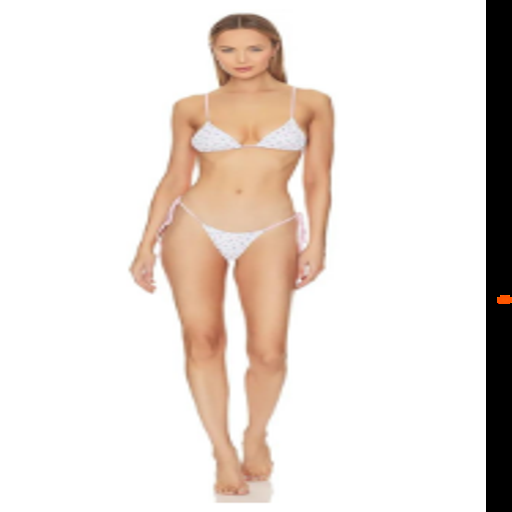


Clothes image (resized to 512x512, RGB, for IP-Adapter):


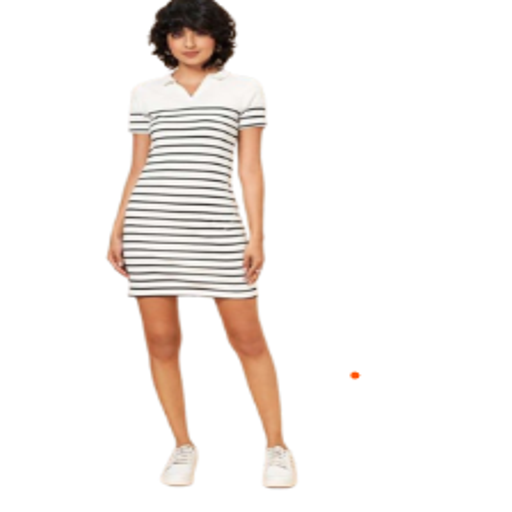


Verifying files in assets directory:
try.png  with.png


In [2]:
from PIL import Image
from IPython.display import display # Already imported, but good to be explicit

# --- Define paths to your uploaded images ---
# !!! IMPORTANT: Replace these filenames with the EXACT names of your uploaded files !!!
person_image_filename = "try.png"  # e.g., "my_model_photo.jpg"
clothes_image_filename = "with.png" # e.g., "red_dress.png"

# Construct the full paths
base_path = "/content/virtual-try-on-outfit-change/assets/"
person_image_path = base_path + person_image_filename
clothes_image_path = base_path + clothes_image_filename

# --- Load and Display Input Images ---
try:
    print(f"Attempting to load person image from: {person_image_path}")
    person_image_input = Image.open(person_image_path).resize((512, 512)).convert('RGB')

    print(f"Attempting to load clothes image from: {clothes_image_path}")
    clothes_image_input = Image.open(clothes_image_path).resize((512, 512)).convert('RGB')

    print("\nPerson image (resized to 512x512, RGB):")
    display(person_image_input)
    print("\nClothes image (resized to 512x512, RGB, for IP-Adapter):")
    display(clothes_image_input)

except FileNotFoundError as e:
    print(f"ERROR: File not found. {e}")
    print(f"Please ensure '{person_image_filename}' is in '{base_path}'")
    print(f"And '{clothes_image_filename}' is in '{base_path}'")
    print("Double-check the filenames and that they are in the 'assets' subfolder.")
except Exception as e:
    print(f"An error occurred while loading images: {e}")

# You can also verify the files exist using a shell command
print("\nVerifying files in assets directory:")
!ls /content/virtual-try-on-outfit-change/assets/

Generating body mask (region to be inpainted, face should be excluded)...
This uses the 'mattmdjaga/segformer_b2_clothes' model and 'insightface' for face exclusion.

Body Mask (L mode, for inpainting):
White areas = to be inpainted. Black areas = preserved (e.g., face, background).


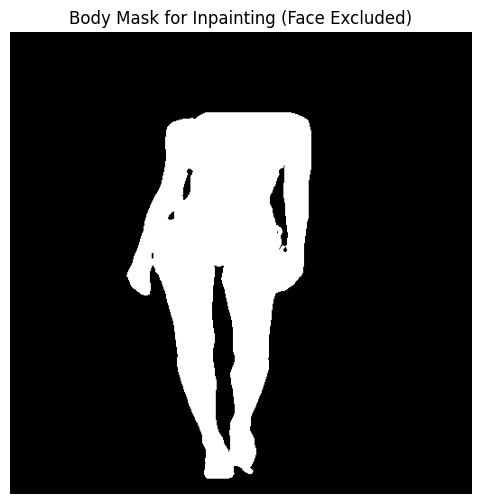

Segmenting clothes (for visualization purposes)...
This also uses the 'mattmdjaga/segformer_b2_clothes' model.

Segmented Clothes (RGBA - for visualization):
This shows the clothing item with the background made transparent.


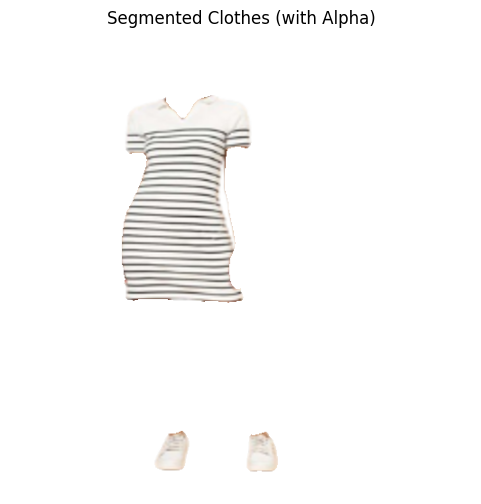

In [3]:
# Step 6a: Test Body Segmentation (Mask for Inpainting)

# Make sure necessary imports are available if running cells non-sequentially
from virtual_try_on.body_segmentation import apply_segmentation
from IPython.display import display
import matplotlib.pyplot as plt # For more consistent display

# Ensure person_image_input is available from the previous step
if 'person_image_input' in locals():
    print("Generating body mask (region to be inpainted, face should be excluded)...")
    print("This uses the 'mattmdjaga/segformer_b2_clothes' model and 'insightface' for face exclusion.")

    # We pass a copy because apply_segmentation might modify the image if not careful (though yours seems safe)
    # include_face=False is crucial as it's used in your virtual_try_on function
    segmented_person_rgba, body_mask_for_inpainting_pil = apply_segmentation(person_image_input.copy(), include_face=False)

    print("\nBody Mask (L mode, for inpainting):")
    print("White areas = to be inpainted. Black areas = preserved (e.g., face, background).")

    # Displaying L-mode (grayscale) images
    plt.figure(figsize=(6,6))
    plt.imshow(body_mask_for_inpainting_pil, cmap='gray') # Use cmap='gray' for L-mode
    plt.title("Body Mask for Inpainting (Face Excluded)")
    plt.axis('off')
    plt.show()

    # --- Optional: Display the segmented person with alpha (RGBA) ---
    # This shows the original person image with the non-masked parts made transparent.
    # print("\nSegmented Person (RGBA - for visualization):")
    # plt.figure(figsize=(6,6))
    # plt.imshow(segmented_person_rgba)
    # plt.title("Segmented Person (Alpha Channel based on Mask)")
    # plt.axis('off')
    # plt.show()

else:
    print("Skipping body segmentation test: 'person_image_input' not found.")
    print("Please ensure you have run Step 5 (loading input images) successfully.")


# Step 6b: Test Clothes Segmentation (Visual Feedback)

# Make sure necessary imports are available
from virtual_try_on.clothes_segmentation import segment_clothing
import matplotlib.pyplot as plt # For displaying RGBA images properly

# Ensure clothes_image_input is available from Step 5
if 'clothes_image_input' in locals():
    print("Segmenting clothes (for visualization purposes)...")
    print("This also uses the 'mattmdjaga/segformer_b2_clothes' model.")

    # The input to segment_clothing should be an RGB PIL image
    # clothes_image_input is already in this format from Step 5
    seg_clothes_rgba = segment_clothing(clothes_image_input.copy())

    print("\nSegmented Clothes (RGBA - for visualization):")
    print("This shows the clothing item with the background made transparent.")

    plt.figure(figsize=(6,6))
    plt.imshow(seg_clothes_rgba) # imshow handles RGBA PIL images well
    plt.title("Segmented Clothes (with Alpha)")
    plt.axis('off')
    plt.show()

else:
    print("Skipping clothes segmentation test: 'clothes_image_input' not found.")
    print("Please ensure you have run Step 5 (loading input images) successfully.")

Starting full virtual_try_on process...
This will take some time (aiming for 2-5 minutes after model loading for 50 steps on T4)...

Parameters for this run:
  Prompt: 'A realistic photo of a person wearing the provided clothes, high quality, good fit, photorealistic'
  IP Adapter Scale: 0.7
  Inpainting Strength: 0.85
  Inference Steps: 50
Using 50 inference steps on cuda with DPM scheduler.
Applying body segmentation for mask...
Starting virtual try-on inference...
Using IP Adapter with scale: 0.7


  0%|          | 0/42 [00:00<?, ?it/s]

Inference complete.

--- Inference complete in 37.11 seconds ---

--- Virtual Try-On Result ---


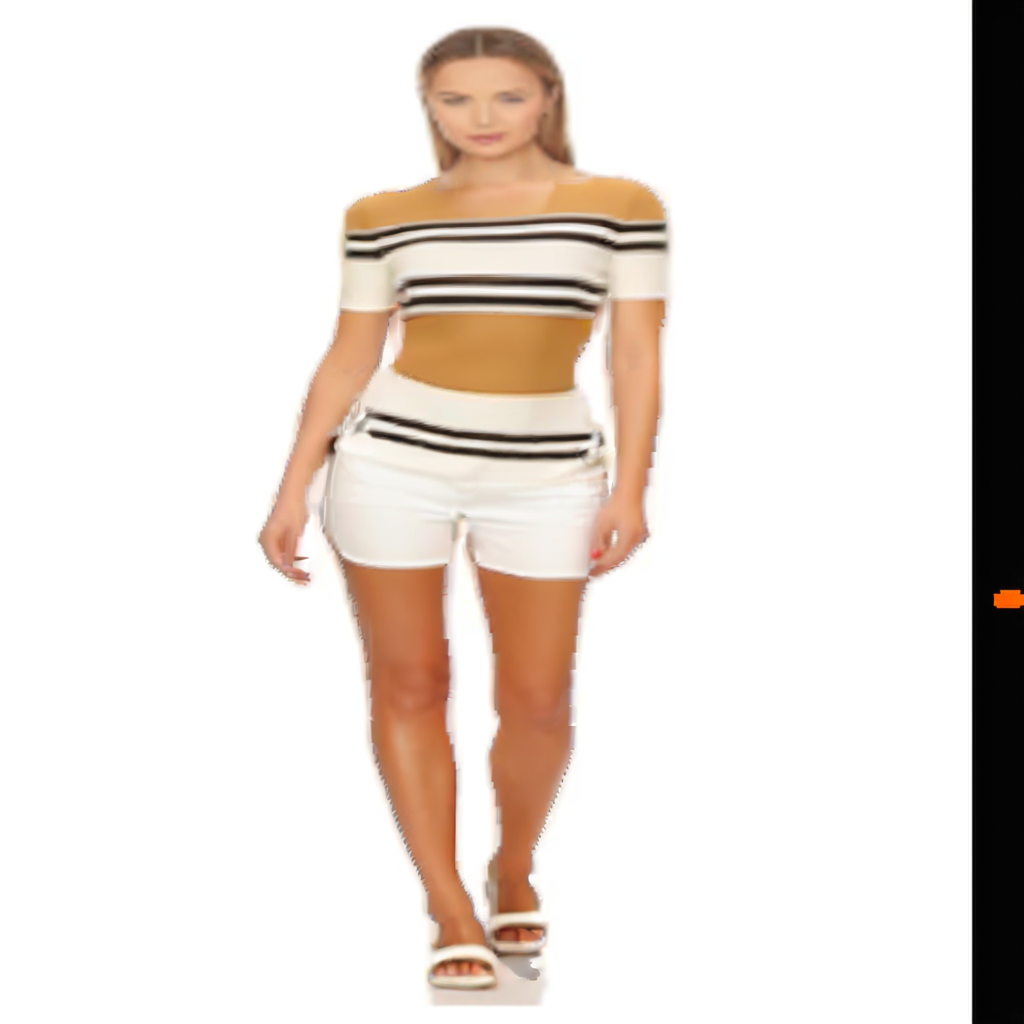


Result saved to: /content/virtual-try-on-outfit-change/assets/try_on_result_steps50_strength0.85_ipscale0.7.png
You can download it from the Colab file explorer under assets.


In [4]:
# Step 7: Run the Full Virtual Try-On Pipeline

# Make sure necessary imports and variables are available
from virtual_try_on.try_on import virtual_try_on, ip_adapter_loaded_successfully
from IPython.display import display
import time # To time the inference

# Ensure input images and the try_on function are available
if ('person_image_input' in locals() and
    'clothes_image_input' in locals() and
    'virtual_try_on' in globals() and
    ip_adapter_loaded_successfully): # Crucially check if IP Adapter is ready

    print("Starting full virtual_try_on process...")
    print("This will take some time (aiming for 2-5 minutes after model loading for 50 steps on T4)...")

    # Parameters from your app.py, can be tweaked here for experimentation
    prompt = "A realistic photo of a person wearing the provided clothes, high quality, good fit, photorealistic"
    negative_prompt = (
        "ugly, bad quality, bad anatomy, deformed body, deformed hands, deformed feet, "
        "deformed face, deformed clothing, bad clothing, distorted clothing, "
        "poorly fitting clothing, naked, text, watermark, signature, blur, low resolution, "
        "jpeg artifacts, compression artifacts, poorly drawn, cartoon, anime, sketch" # Added more negative terms
    )
    ip_adapter_scale = 0.7  # Controls IP-Adapter influence (0.0 to 1.0, sometimes higher)
    strength_value = 0.85   # Inpainting strength (0.0 to 1.0). Higher = more change from original.
                            # For try-on, 0.8-0.95 is common.
    num_inference_steps = 50 # Uses default from try_on.py if not specified,
                             # but we can set it explicitly.
                             # Lower (e.g., 25-30) for faster tests, higher (50-75) for quality.

    print(f"\nParameters for this run:")
    print(f"  Prompt: '{prompt}'")
    print(f"  IP Adapter Scale: {ip_adapter_scale}")
    print(f"  Inpainting Strength: {strength_value}")
    print(f"  Inference Steps: {num_inference_steps}")

    # Ensure we're using fresh copies of the images for the pipeline
    person_img_for_tryon = person_image_input.copy()
    clothing_img_for_ipadapter = clothes_image_input.copy()

    start_time = time.time()
    try:
        result_image_pil = virtual_try_on(
            img=person_img_for_tryon,
            clothing_ip_image=clothing_img_for_ipadapter, # Original clothes image for IP-Adapter
            prompt=prompt,
            negative_prompt=negative_prompt,
            ip_scale=ip_adapter_scale,
            strength=strength_value,
            steps=num_inference_steps # Pass the number of steps
        )
        end_time = time.time()
        inference_duration = end_time - start_time
        print(f"\n--- Inference complete in {inference_duration:.2f} seconds ---")

        print("\n--- Virtual Try-On Result ---")
        display(result_image_pil)

        # Save the result
        output_filename = f"try_on_result_steps{num_inference_steps}_strength{strength_value}_ipscale{ip_adapter_scale}.png"
        output_path = f"/content/virtual-try-on-outfit-change/assets/{output_filename}"
        result_image_pil.save(output_path)
        print(f"\nResult saved to: {output_path}")
        print("You can download it from the Colab file explorer under assets.")

    except Exception as e:
        print(f"\nAn error occurred during the virtual_try_on process: {e}")
        import traceback
        traceback.print_exc() # Print full traceback for debugging

elif not ip_adapter_loaded_successfully:
    print("IP Adapter did not load successfully. Skipping virtual try-on to prevent poor results or errors.")
else:
    print("Skipping virtual try-on: Ensure input images ('person_image_input', 'clothes_image_input') "
          "are loaded and the 'virtual_try_on' function is available.")

In [ ]:
!python /content/virtual-try-on-outfit-change/app_gradio.py

Project root added to sys.path: /content/virtual-try-on-outfit-change
Importing virtual_try_on.try_on - This will load models (may take time)...
2025-06-09 10:22:14.892913: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749464535.166152   13751 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749464535.246360   13751 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Initializing FaceAnalysis for body_segmentation (loading only detection and landmarks)...
/usr/local/lib/python3.11/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:121: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available pro